# Miles per Gallon Linear Regression Analysis

Github Link: https://github.com/TrangNguyen95/MPGLinearAnalysis

Data: mp.csv

Data details were retrieved from: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

Attribute Information:

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)



In [1]:
import os
os.getcwd()

'C:\\Users\\Trang\\Anaconda3\\BUAN6340\\Midterm'

## Import Packages

In [2]:
import numpy as np
import pandas as pd


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

2.2.3


In [5]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Exploratory Data Analysis

In [6]:
MPG_1=pd.read_csv('mpg.csv')

In [7]:
MPG_1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
MPG_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
def DFStat(df, var):
    title = "Codebook for " + str(var)
    unique_values = len(df[var].unique())
    max_v = df[var].max()
    min_v = df[var].min()
    n_miss = sum(pd.isnull(df[var]))
    mean = df[var].mean()
    stdev = df[var].std()
    df1= pd.DataFrame({'title': title, 'unique values': unique_values, 'max value' : max_v,'min value': min_v,'mean' : mean,'stdev' : stdev, 'num of missing' : n_miss},index=[0])
    print(df1)
    return


In [10]:
DFStat(MPG_1,'mpg')

   max value       mean  min value  num of missing     stdev  \
0       46.6  23.514573        9.0               0  7.815984   

              title  unique values  
0  Codebook for mpg            129  


Text(0.5,1,'MPG Histogram')

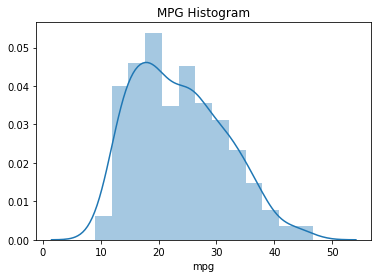

In [11]:
sns.distplot(MPG_1['mpg'])
plt.title('MPG Histogram')

#### Explore Correlations among Attributes

Converting object variables to integer.

In [12]:
MPG=MPG_1.drop(['name'],axis=1)

In [13]:
#Final
from sklearn import preprocessing
for column in MPG.columns:
    if MPG[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        MPG[column] = le.fit_transform(MPG[column])

Text(0.5,1,'Heatmap Shows Correlations among Attributes')

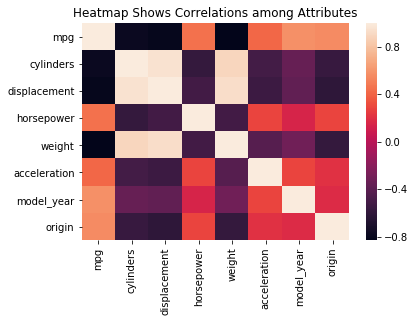

In [14]:
sns.heatmap(MPG.corr())
plt.title('Heatmap Shows Correlations among Attributes')


Text(0.5,0.98,'Correlations among Attributes')

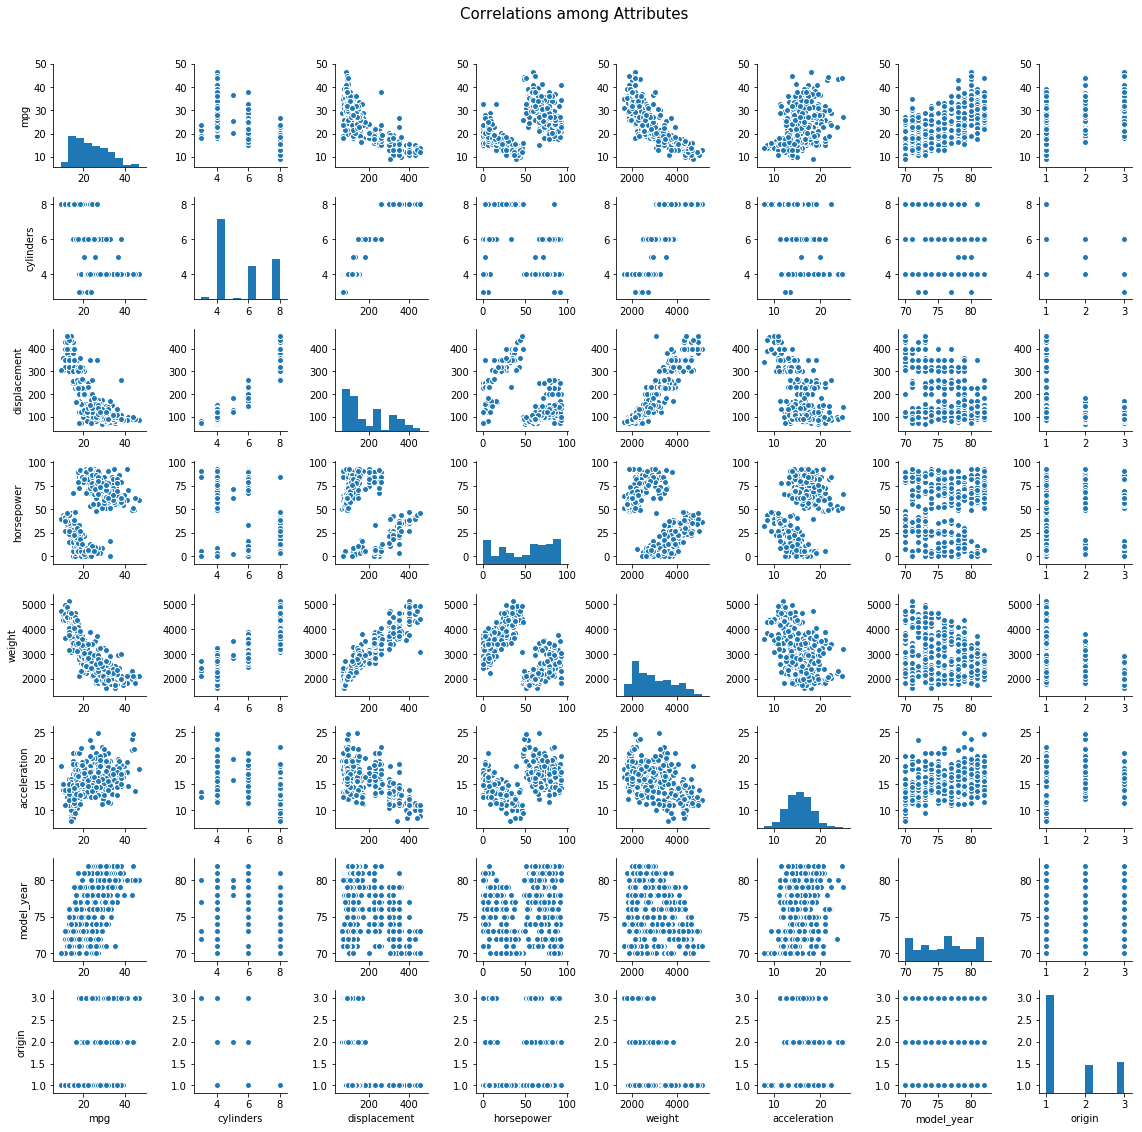

In [15]:
g3=sns.pairplot(MPG,size=2)
plt.subplots_adjust(top=0.93)
g3.fig.suptitle('Correlations among Attributes',size=15)


From the heatmap and pairplot, mpg has the highest negative correlation with cylinders, displacement, and weight. Besides, there is a potential of multicollinearity problem in the model if we use all attributes as independend variables. For example, cylinders and weight has high positive correlation. 

## Converting Categorical Features 

Since the vehicle name could effect the mpg, we will create dummies to exam this attributes.

In [16]:
MPG['name']=MPG_1['name']

In [17]:
dummies=pd.get_dummies(MPG['name'],drop_first=True)

In [18]:
MPG_df1=MPG.drop(['name'],axis=1)
MPG_df2=pd.concat([MPG_df1,dummies],axis=1).reset_index()


In [19]:
MPG_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Columns: 313 entries, index to vw rabbit custom
dtypes: float64(3), int64(6), uint8(304)
memory usage: 146.2 KB


In [20]:
MPG_df2.describe()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,amc ambassador dpl,...,volvo 145e (sw),volvo 244dl,volvo 245,volvo 264gl,volvo diesel,vw dasher (diesel),vw pickup,vw rabbit,vw rabbit c (diesel),vw rabbit custom
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,198.500000,23.514573,5.454774,193.425879,50.806533,2970.424623,15.568090,76.010050,1.572864,0.002513,...,0.002513,0.002513,0.002513,0.002513,0.002513,0.002513,0.002513,0.005025,0.002513,0.002513
std,115.036951,7.815984,1.701004,104.269838,29.737225,846.841774,2.757689,3.697627,0.802055,0.050125,...,0.050125,0.050125,0.050125,0.050125,0.050125,0.050125,0.050125,0.070799,0.050125,0.050125
min,0.000000,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.250000,17.500000,4.000000,104.250000,26.250000,2223.750000,13.825000,73.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,198.500000,23.000000,4.000000,148.500000,60.000000,2803.500000,15.500000,76.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,297.750000,29.000000,8.000000,262.000000,78.000000,3608.000000,17.175000,79.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,397.000000,46.600000,8.000000,455.000000,93.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Linear Regression Model

#### Train Test Split

In [21]:
y_var=MPG_df2['mpg']
X=MPG_df2.drop(['mpg'],axis=1)

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Columns: 312 entries, index to vw rabbit custom
dtypes: float64(2), int64(6), uint8(304)
memory usage: 143.1 KB


#### Building the Model

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train1, y_test1 = train_test_split(X, y_var, test_size=0.4, random_state=101)

In [27]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [29]:
X_train1a=sm.add_constant(X_train)
X_test1=sm.add_constant(X_test)

In [30]:
X_train1=X_train1a.drop(['index'],axis=1)

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

##### Model1

In [32]:
lm.fit(X_train1, y_train1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
model1 = smf.OLS(y_train1,X_train1)
fitted1 = model1.fit()
fitted1.summary()

C:\Users\Trang\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Trang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in greater

C:\Users\Trang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in less

C:\Users\Trang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning:

invalid value encountered in less_equal



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     11.04
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           4.72e-11
Time:                        21:17:55   Log-Likelihood:                -308.77
No. Observations:                 238   AIC:                             1034.
Df Residuals:                      30   BIC:                             1756.
Df Model:                         207                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -46.3280     18.438     -2.513      0.018     -83.984      -8.672
cylinders                                1.0114      1.142      0.886      0.383      -1.320       3.343
displacement                             0.0097      0.025      0.392      0.698      -0.041       0.060
horsepower                               0.0063      0.022      0.287      0.776      -0.039       0.051
weight                                  -0.0086      0.003     -3.277      0.003      -0.014      -0.003
acceleration                            -0.2936      0.262     -1.122      0.271      -0.828       0.241
model_year                               1.0912      0.204      5.353      0.000       0.675       1.508
origin                                   3.8566      2.717      1.419      0.166      -1.693       9.406
amc ambassador dpl                    1.993e-12      6e-13      3.321      0.002    7.68e-13    3.22e-12
amc ambassador sst                       4.5615      3.711      1.229      0.229      -3.018      12.141
amc concord                           1.258e-12   1.41e-12      0.892      0.380   -1.62e-12    4.14e-12
amc concord d/l                       1.129e-12   6.29e-13      1.794      0.083   -1.56e-13    2.41e-12
amc concord dl                           1.9434      5.108      0.380      0.706      -8.488      12.375
amc concord dl 6                         0.9611      4.104      0.234      0.816      -7.421       9.343
amc gremlin                              0.8175      4.341      0.188      0.852      -8.048       9.683
amc hornet                               2.2150      3.957      0.560      0.580      -5.866      10.296
amc hornet sportabout (sw)               3.7526      4.243      0.884      0.384      -4.913      12.418
amc matador                              6.0091      4.077      1.474      0.151      -2.317      14.335
amc matador (sw)                         5.5719      4.087      1.363      0.183      -2.775      13.919
amc pacer                                3.3104      4.019      0.824      0.417      -4.898      11.518
amc pacer d/l                         5.829e-12   2.52e-12      2.315      0.028    6.87e-13     1.1e-11
amc rebel sst                            3.8406      3.696      1.039      0.307      -3.707      11.388
amc spirit dl                        -6.139e-12   3.04e-12     -2.019      0.053   -1.23e-11    7.07e-14
audi 100 ls                              5.7147      3.579      1.597      0.121      -1.595      13.024
audi 100ls                               0.5421      2.992      0.181      0.857      -5.568       6.652
audi 4000                                3.5816      3.317      1.080      0.289      -3.193      10.356
audi 5000                             

Looking at the Durbin Watson of 0 < 1.9 < 2, there is a slight positive autocorrelation problem in the model. However, we will continue to improve the model and see if we need to address this problem.

In [98]:
lm.fit(X_test,y_test1)
predictions = lm.predict(X_test)

#### Improving the model

Using alpha of 0.05, we will look into making all independent variables significant. 

##### Model2

We will start dropping insiggnificant dummies variables that have p-value less than alpha to improve the model.

In [35]:
alpha = 0.05
X_stat2 = pd.DataFrame(data = [x for x in fitted1.summary().tables[1].data[1:] if float(x[4]) > alpha], columns = fitted1.summary().tables[1].data[0])

In [36]:
X_stat2.columns=['Variables','coef','std err','t','P>|t|','[0.025','0.975]']


In [37]:
X_train2=X_train1.drop(X_stat2['Variables'],axis=1)
X_test2=X_test1.drop(X_stat2['Variables'],axis=1)

In [38]:
X_train2['cylinders']=X_train1['cylinders']
X_train2['displacement']=X_train1['displacement']
X_train2['horsepower']=X_train1['horsepower']
X_train2['acceleration']=X_train1['acceleration']

X_test2['cylinders']=X_test1['cylinders']
X_test2['displacement']=X_test1['displacement']
X_test2['horsepower']=X_test1['horsepower']
X_test2['acceleration']=X_test1['acceleration']


In [39]:
y_train2=y_train1
y_test2=y_test1


lm.fit(X_train2, y_train2)
predictions2 = lm.predict(X_train2)

model2 = smf.OLS(y_train2,X_train2)
fitted2 = model2.fit()
fitted2.summary()


C:\Users\Trang\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Trang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in greater

C:\Users\Trang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in less

C:\Users\Trang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning:

invalid value encountered in less_equal



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     57.17
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           2.98e-83
Time:                        21:19:01   Log-Likelihood:                -564.86
No. Observations:                 238   AIC:                             1190.
Df Residuals:                     208   BIC:                             1294.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -12.9490      4.646     -2.787      0.006     -22.109      -3.789
weight                               -0.0070      0.001     -9.582      0.000      -0.008      -0.006
model_year                            0.7662      0.056     13.567      0.000       0.655       0.878
amc ambassador dpl                -1.117e-11    5.7e-12     -1.960      0.051   -2.24e-11    6.32e-14
amc pacer d/l                     -1.808e-11   9.98e-12     -1.812      0.071   -3.77e-11    1.59e-12
audi 5000s (diesel)                  10.8194      2.829      3.824      0.000       5.242      16.397
bmw 320i                           2.618e-12   1.06e-12      2.460      0.015     5.2e-13    4.72e-12
buick estate wagon (sw)             2.65e-12   1.29e-12      2.062      0.040    1.16e-13    5.18e-12
buick regal sport coupe (turbo)    1.087e-13   3.81e-13      0.285      0.776   -6.43e-13     8.6e-13
chevroelt chevelle malibu          7.686e-13   4.78e-13      1.609      0.109   -1.73e-13    1.71e-12
chevrolet impala                      3.0258      1.704      1.776      0.077      -0.334       6.385
chevrolet monte carlo             -3.337e-13   1.78e-13     -1.877      0.062   -6.84e-13    1.69e-14
chevrolet vega 2300                   3.6304      2.824      1.285      0.200      -1.938       9.198
datsun 200-sx                        -4.9288      2.801     -1.760      0.080     -10.450       0.592
datsun 200sx                      -4.331e-13   2.87e-13     -1.508      0.133   -9.99e-13    1.33e-13
datsun 310                         -1.33e-12   7.84e-13     -1.696      0.091   -2.88e-12    2.16e-13
datsun 510                         1.055e-12   1.31e-12      0.808      0.420   -1.52e-12    3.63e-12
datsun 510 (sw)                    1.974e-14   1.93e-14      1.023      0.308   -1.83e-14    5.78e-14
datsun 810 maxima                    -2.7408      2.874     -0.954      0.341      -8.407       2.925
datsun b-210                      -2.535e-13   1.94e-13     -1.307      0.193   -6.36e-13    1.29e-13
datsun b210 gx                        9.0507      2.800      3.232      0.001       3.530      14.571
datsun pl510                        3.59e-13   2.64e-13      1.362      0.175   -1.61e-13    8.79e-13
dodge monaco (sw)                     5.7713      2.862      2.016      0.045       0.128      11.414
fiat 124b                             4.3608      2.821      1.546      0.124      -1.200       9.921
fiat strada custom                    6.0542      2.801      2.161      0.032       0.532      11.576
ford galaxie 500                      3.7441      2.041      1.835      0.068      -0.279       7.768
honda accord cvcc                 -1.157e-12   8.56e-13     -1.352      0.178   -2.84e-12    5.31e-13
honda civic (auto)     

BIC shows significant improvement and indicates that model 2 is better fit than model 1.

##### Model3

We will continue dropping the insignificant dummies to improve the model.

In [40]:
alpha = 0.05
X_stat3 = pd.DataFrame(data = [x for x in fitted2.summary().tables[1].data[1:] if float(x[4]) > alpha], columns = fitted2.summary().tables[1].data[0])

In [41]:
X_stat3.columns=['Variables','coef','std err','t','P>|t|','[0.025','0.975]']


In [42]:
X_train3=X_train2.drop(X_stat3['Variables'],axis=1)
X_test3=X_test2.drop(X_stat3['Variables'],axis=1)

In [43]:
X_train3['cylinders']=X_train1['cylinders']
X_train3['displacement']=X_train1['displacement']
X_train3['horsepower']=X_train1['horsepower']
X_train3['acceleration']=X_train1['acceleration']


X_test3['cylinders']=X_test1['cylinders']
X_test3['displacement']=X_test1['displacement']
X_test3['horsepower']=X_test1['horsepower']
X_test3['acceleration']=X_test1['acceleration']


In [44]:
y_train3=y_train1
y_test3=y_test1

lm.fit(X_train3, y_train3)
predictions3 = lm.predict(X_train3)

model3 = smf.OLS(y_train3,X_train3)
fitted3 = model3.fit()
fitted3.summary()


C:\Users\Trang\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Trang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in greater

C:\Users\Trang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in less

C:\Users\Trang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning:

invalid value encountered in less_equal



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     78.99
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           6.72e-88
Time:                        21:21:51   Log-Likelihood:                -574.40
No. Observations:                 238   AIC:                             1191.
Df Residuals:                     217   BIC:                             1264.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -9.4405      4.546     -2.077      0.039     -18.401      -0.480
weight                               -0.0070      0.001     -9.529      0.000      -0.008      -0.006
model_year                            0.7188      0.055     13.011      0.000       0.610       0.828
audi 5000s (diesel)                  11.0478      2.879      3.837      0.000       5.373      16.723
bmw 320i                           3.333e-13   2.05e-13      1.630      0.105   -6.98e-14    7.36e-13
buick estate wagon (sw)           -6.832e-14   2.52e-14     -2.716      0.007   -1.18e-13   -1.87e-14
datsun b210 gx                        9.1649      2.852      3.213      0.002       3.543      14.787
dodge monaco (sw)                     5.1542      2.908      1.772      0.078      -0.578      10.887
fiat strada custom                    6.2822      2.853      2.202      0.029       0.659      11.905
honda civic 1500 gl                  10.8290      2.867      3.776      0.000       5.177      16.481
maxda rx3                            -9.2163      2.885     -3.195      0.002     -14.902      -3.531
mercedes-benz 240d                    6.4506      2.914      2.214      0.028       0.708      12.193
oldsmobile cutlass ciera (diesel)    10.3053      2.921      3.528      0.001       4.548      16.062
peugeot 504                           4.2559      2.084      2.042      0.042       0.148       8.363
pontiac astro                      2.197e-13   5.79e-14      3.798      0.000    1.06e-13    3.34e-13
pontiac catalina brougham          1.725e-13    2.5e-13      0.690      0.491    -3.2e-13    6.65e-13
pontiac phoenix lj                -1.637e-13   1.36e-13     -1.206      0.229   -4.31e-13    1.04e-13
pontiac safari (sw)                   7.3720      2.921      2.524      0.012       1.615      13.129
pontiac ventura sj                -6.164e-17   1.53e-16     -0.404      0.687   -3.62e-16    2.39e-16
renault 12tl                      -2.658e-16   2.16e-16     -1.229      0.220   -6.92e-16     1.6e-16
renault 18i                        6.047e-17   7.07e-16      0.086      0.932   -1.33e-15    1.45e-15
renault 5 gtl                      4.799e-16   2.81e-16      1.707      0.089   -7.41e-17    1.03e-15
renault lecar deluxe                  7.1544      2.869      2.494      0.013       1.500      12.809
toyota celica gt liftback            -7.1108      2.854     -2.492      0.013     -12.736      -1.486
toyota corona hardtop                      0          0        nan        nan           0           0
toyota cressida                            0          0        nan        nan           0           0
toyota tercel                              0          0        nan        nan           0           0
volkswagen 1131 deluxe 

BIC continues showing improvement and indicates that model 3 is better fit than model 2.

##### Model4

Since we see that there are some nan value in the OLS table, we will drop the variables that related to these values and the insignificant variables before rerun the model.

In [45]:
alpha = 0.05
X_stat4 = pd.DataFrame(data = [x for x in fitted3.summary().tables[1].data[1:] if float(x[4]) > alpha], columns = fitted3.summary().tables[1].data[0])

In [46]:
X_stat4.columns=['Variables','coef','std err','t','P>|t|','[0.025','0.975]']

In [47]:
X_stat4

,Variables,coef,std err,t,P>|t|,[0.025,0.975]
0,bmw 320i,3.333e-13,2.05e-13,1.630,0.105,-6.98e-14,7.36e-13
1,dodge monaco (sw),5.1542,2.908,1.772,0.078,-0.578,10.887
2,pontiac catalina brougham,1.725e-13,2.5e-13,0.690,0.491,-3.2e-13,6.65e-13
3,pontiac phoenix lj,-1.637e-13,1.36e-13,-1.206,0.229,-4.31e-13,1.04e-13
4,pontiac ventura sj,-6.164e-17,1.53e-16,-0.404,0.687,-3.62e-16,2.39e-16
5,renault 12tl,-2.658e-16,2.16e-16,-1.229,0.220,-6.92e-16,1.6e-16
6,renault 18i,6.047e-17,7.07e-16,0.086,0.932,-1.33e-15,1.45e-15
7,renault 5 gtl,4.799e-16,2.81e-16,1.707,0.089,-7.41e-17,1.03e-15
8,cylinders,-0.3004,0.374,-0.803,0.423,-1.038,0.437
9,displacement,0.0082,0.009,0.956,0.340,-0.009,0.025


In [48]:
X_train4=X_train3.drop(X_stat4['Variables'],axis=1)
X_test4=X_test3.drop(X_stat4['Variables'],axis=1)

In [49]:
X_train4['cylinders']=X_train1['cylinders']
X_train4['displacement']=X_train1['displacement']
X_train4['horsepower']=X_train1['horsepower']
X_train4['acceleration']=X_train1['acceleration']


X_test4['cylinders']=X_test1['cylinders']
X_test4['displacement']=X_test1['displacement']
X_test4['horsepower']=X_test1['horsepower']
X_test4['acceleration']=X_test1['acceleration']

In [50]:
y_train4=y_train1
y_test4=y_test1

lm.fit(X_train4, y_train4)
predictions4 = lm.predict(X_train4)

model4 = smf.OLS(y_train4,X_train4)
fitted4 = model4.fit()
fitted4.summary()

C:\Users\Trang\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Trang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in greater

C:\Users\Trang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in less

C:\Users\Trang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning:

invalid value encountered in less_equal



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     82.18
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           3.41e-88
Time:                        21:22:59   Log-Likelihood:                -576.11
No. Observations:                 238   AIC:                             1192.
Df Residuals:                     218   BIC:                             1262.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -9.0777      4.564     -1.989      0.048     -18.073      -0.083
weight                               -0.0068      0.001     -9.321      0.000      -0.008      -0.005
model_year                            0.7132      0.055     12.868      0.000       0.604       0.822
audi 5000s (diesel)                  11.0352      2.893      3.814      0.000       5.333      16.738
buick estate wagon (sw)            4.921e-13   2.58e-13      1.911      0.057   -1.55e-14       1e-12
datsun b210 gx                        9.2416      2.866      3.225      0.001       3.593      14.890
fiat strada custom                    6.3034      2.867      2.199      0.029       0.653      11.954
honda civic 1500 gl                  10.9026      2.881      3.784      0.000       5.224      16.581
maxda rx3                            -9.3044      2.898     -3.210      0.002     -15.017      -3.592
mercedes-benz 240d                    6.3884      2.928      2.182      0.030       0.618      12.159
oldsmobile cutlass ciera (diesel)    10.3910      2.935      3.541      0.000       4.607      16.175
peugeot 504                           4.1981      2.094      2.005      0.046       0.071       8.325
pontiac astro                      2.196e-15   6.19e-16      3.545      0.000    9.75e-16    3.42e-15
pontiac safari (sw)                   7.0845      2.931      2.417      0.016       1.308      12.861
renault lecar deluxe                  7.2603      2.883      2.519      0.012       1.579      12.942
toyota celica gt liftback            -7.1506      2.868     -2.493      0.013     -12.803      -1.498
toyota corona hardtop             -5.119e-16   4.33e-16     -1.184      0.238   -1.36e-15     3.4e-16
toyota cressida                   -3.421e-16   3.64e-16     -0.940      0.348   -1.06e-15    3.75e-16
toyota tercel                     -4.905e-16   3.65e-16     -1.343      0.181   -1.21e-15    2.29e-16
volkswagen 1131 deluxe sedan      -7.235e-17   7.95e-17     -0.910      0.364   -2.29e-16    8.44e-17
volkswagen rabbit custom           -1.72e-16   2.83e-16     -0.607      0.544    -7.3e-16    3.86e-16
volkswagen rabbit custom diesel      12.8706      2.908      4.427      0.000       7.140      18.601
volkswagen rabbit l                        0          0        nan        nan           0           0
vw dasher (diesel)                   14.3927      2.929      4.914      0.000       8.620      20.165
vw pickup                                  0          0        nan        nan           0           0
vw rabbit c (diesel)                       0          0        nan        nan           0           0
vw rabbit custom                           0          0        nan        nan           0           0
cylinders              

F-statistic and BIC continue showing improvement in model 4 comparing to model 3. 

##### Model5

We will continue to drop the insignificant dummies variables before rerun the model.

In [51]:
alpha = 0.05
X_stat5 = pd.DataFrame(data = [x for x in fitted4.summary().tables[1].data[1:] if float(x[4]) > alpha], columns = fitted4.summary().tables[1].data[0])


In [52]:
X_stat5.columns=['Variables','coef','std err','t','P>|t|','[0.025','0.975]']

In [53]:
X_stat5

,Variables,coef,std err,t,P>|t|,[0.025,0.975]
0,buick estate wagon (sw),4.921e-13,2.58e-13,1.911,0.057,-1.55e-14,1e-12
1,toyota corona hardtop,-5.119e-16,4.33e-16,-1.184,0.238,-1.36e-15,3.4e-16
2,toyota cressida,-3.421e-16,3.64e-16,-0.940,0.348,-1.06e-15,3.75e-16
3,toyota tercel,-4.905e-16,3.65e-16,-1.343,0.181,-1.21e-15,2.29e-16
4,volkswagen 1131 deluxe sedan,-7.235e-17,7.95e-17,-0.910,0.364,-2.29e-16,8.44e-17
5,volkswagen rabbit custom,-1.72e-16,2.83e-16,-0.607,0.544,-7.3e-16,3.86e-16
6,cylinders,-0.3342,0.376,-0.890,0.375,-1.074,0.406
7,displacement,0.0074,0.009,0.858,0.392,-0.010,0.024
8,horsepower,0.0107,0.008,1.391,0.166,-0.004,0.026
9,acceleration,-0.1275,0.094,-1.354,0.177,-0.313,0.058


In [54]:
X_train5=X_train4.drop(X_stat5['Variables'],axis=1)
X_test5=X_test4.drop(X_stat5['Variables'],axis=1)

In [55]:
X_train5['cylinders']=X_train1['cylinders']
X_train5['displacement']=X_train1['displacement']
X_train5['horsepower']=X_train1['horsepower']
X_train5['acceleration']=X_train1['acceleration']


X_test5['cylinders']=X_test1['cylinders']
X_test5['displacement']=X_test1['displacement']
X_test5['horsepower']=X_test1['horsepower']
X_test5['acceleration']=X_test1['acceleration']

In [56]:
y_train5=y_train1
y_test5=y_test1

lm.fit(X_train5, y_train5)
predictions5 = lm.predict(X_train5)

model5 = smf.OLS(y_train5,X_train5)
fitted5 = model5.fit()
fitted5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     82.18
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           3.41e-88
Time:                        21:26:01   Log-Likelihood:                -576.11
No. Observations:                 238   AIC:                             1192.
Df Residuals:                     218   BIC:                             1262.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -9.0777      4.564     -1.989      0.048     -18.073      -0.083
weight                               -0.0068      0.001     -9.321      0.000      -0.008      -0.005
model_year                            0.7132      0.055     12.868      0.000       0.604       0.822
audi 5000s (diesel)                  11.0352      2.893      3.814      0.000       5.333      16.738
datsun b210 gx                        9.2416      2.866      3.225      0.001       3.593      14.890
fiat strada custom                    6.3034      2.867      2.199      0.029       0.653      11.954
honda civic 1500 gl                  10.9026      2.881      3.784      0.000       5.224      16.581
maxda rx3                            -9.3044      2.898     -3.210      0.002     -15.017      -3.592
mercedes-benz 240d                    6.3884      2.928      2.182      0.030       0.618      12.159
oldsmobile cutlass ciera (diesel)    10.3910      2.935      3.541      0.000       4.607      16.175
peugeot 504                           4.1981      2.094      2.005      0.046       0.071       8.325
pontiac astro                     -1.984e-15   1.62e-15     -1.224      0.222   -5.18e-15    1.21e-15
pontiac safari (sw)                   7.0845      2.931      2.417      0.016       1.308      12.861
renault lecar deluxe                  7.2603      2.883      2.519      0.012       1.579      12.942
toyota celica gt liftback            -7.1506      2.868     -2.493      0.013     -12.803      -1.498
volkswagen rabbit custom diesel      12.8706      2.908      4.427      0.000       7.140      18.601
volkswagen rabbit l               -2.054e-16   3.38e-16     -0.608      0.544   -8.71e-16    4.61e-16
vw dasher (diesel)                   14.3927      2.929      4.914      0.000       8.620      20.165
vw pickup                          8.394e-16    4.5e-16      1.864      0.064   -4.81e-17    1.73e-15
vw rabbit c (diesel)               1.127e-16   6.16e-17      1.829      0.069   -8.77e-18    2.34e-16
vw rabbit custom                    7.56e-17    4.1e-17      1.845      0.066   -5.16e-18    1.56e-16
cylinders                            -0.3342      0.376     -0.890      0.375      -1.074       0.406
displacement                          0.0074      0.009      0.858      0.392      -0.010       0.024
horsepower                            0.0107      0.008      1.391      0.166      -0.004       0.026
acceleration                         -0.1275      0.094     -1.354      0.177      -0.313       0.058
==============================================================================
Omnibus:                        6.527   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.038   Jarque-Bera (JB):            

There is no significant changes in Adj R-squared or BIC between model 4 and model 5. However, we have a more concise model in 5 comparing to 4 with less insignificant variables. 

Since we expected that multicollinearity is possible between the pairs such as cylinders, displacement, and weight. We will exam the independent variable VIF to improve the model.

In [57]:
#Code for VIF Calculation
def vif_cal(input_data, y_col):
    x_vars=input_data.drop([y_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [58]:
#Calculating VIF values using the function above
MPG_df5=pd.concat([y_train5,X_train5],axis=1).reset_index()
MPG5=MPG_df5.drop(['index'],axis=1)

In [59]:
vif_cal(input_data=MPG5, y_col="mpg")

C:\Users\Trang\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Trang\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning:

invalid value encountered in double_scalars



const  VIF =  0.0
weight  VIF =  10.53
model_year  VIF =  1.26
audi 5000s (diesel)  VIF =  1.03
datsun b210 gx  VIF =  1.01
fiat strada custom  VIF =  1.01
honda civic 1500 gl  VIF =  1.02
maxda rx3  VIF =  1.03
mercedes-benz 240d  VIF =  1.05
oldsmobile cutlass ciera (diesel)  VIF =  1.06
peugeot 504  VIF =  1.07
pontiac astro  VIF =  nan
pontiac safari (sw)  VIF =  1.06
renault lecar deluxe  VIF =  1.02
toyota celica gt liftback  VIF =  1.01
volkswagen rabbit custom diesel  VIF =  1.04
volkswagen rabbit l  VIF =  nan
vw dasher (diesel)  VIF =  1.06
vw pickup  VIF =  nan
vw rabbit c (diesel)  VIF =  nan
vw rabbit custom  VIF =  nan
cylinders  VIF =  11.82
displacement  VIF =  22.36
horsepower  VIF =  1.56
acceleration  VIF =  1.96


With the VIF above, we can eliminate some variables to improve the model. 

##### Model6

Let's start with displacement since it has the highest VIF and dummies that are not significant.

In [60]:
alpha = 0.05
X_stat6 = pd.DataFrame(data = [x for x in fitted5.summary().tables[1].data[1:] if float(x[4]) > alpha], columns = fitted5.summary().tables[1].data[0])

In [61]:
X_stat6.columns=['Variables','coef','std err','t','P>|t|','[0.025','0.975]']

In [62]:
X_train6=X_train5.drop(X_stat6['Variables'],axis=1)
X_test6=X_test5.drop(X_stat6['Variables'],axis=1)

In [63]:
X_train6['cylinders']=X_train1['cylinders']
X_train6['horsepower']=X_train1['horsepower']
X_train6['acceleration']=X_train1['acceleration']


X_test6['cylinders']=X_test1['cylinders']
X_test6['horsepower']=X_test1['horsepower']
X_test6['acceleration']=X_test1['acceleration']

In [64]:
y_train6=y_train1
y_test6=y_test1

lm.fit(X_train6, y_train6)
predictions5 = lm.predict(X_train6)

model6 = smf.OLS(y_train6,X_train6)
fitted6 = model6.fit()
fitted6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     86.81
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           5.19e-89
Time:                        21:29:08   Log-Likelihood:                -576.51
No. Observations:                 238   AIC:                             1191.
Df Residuals:                     219   BIC:                             1257.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -9.2214      4.558     -2.023      0.044     -18.205      -0.238
weight                               -0.0063      0.001    -12.003      0.000      -0.007      -0.005
model_year                            0.7084      0.055     12.854      0.000       0.600       0.817
audi 5000s (diesel)                  10.7795      2.876      3.748      0.000       5.111      16.448
datsun b210 gx                        9.2501      2.864      3.229      0.001       3.605      14.895
fiat strada custom                    6.2003      2.863      2.166      0.031       0.559      11.842
honda civic 1500 gl                  10.8939      2.879      3.783      0.000       5.219      16.569
maxda rx3                            -9.4345      2.893     -3.262      0.001     -15.135      -3.734
mercedes-benz 240d                    6.4664      2.924      2.211      0.028       0.703      12.230
oldsmobile cutlass ciera (diesel)    10.8319      2.888      3.751      0.000       5.141      16.523
peugeot 504                           4.2034      2.093      2.009      0.046       0.079       8.328
pontiac safari (sw)                   7.0215      2.928      2.398      0.017       1.251      12.792
renault lecar deluxe                  7.3114      2.880      2.539      0.012       1.635      12.988
toyota celica gt liftback            -7.1216      2.866     -2.485      0.014     -12.770      -1.473
volkswagen rabbit custom diesel      13.0656      2.897      4.510      0.000       7.356      18.775
vw dasher (diesel)                   14.5243      2.923      4.969      0.000       8.763      20.285
cylinders                            -0.1231      0.284     -0.434      0.665      -0.682       0.436
horsepower                            0.0115      0.008      1.503      0.134      -0.004       0.027
acceleration                         -0.1623      0.085     -1.911      0.057      -0.330       0.005
==============================================================================
Omnibus:                        6.019   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                7.161
Skew:                           0.209   Prob(JB):                       0.0279
Kurtosis:                       3.739   Cond. No.                     7.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

F-statistic and BIC show improvement in model 6 comparing to model 5. 

In [65]:
MPG_df6=pd.concat([y_train6,X_train6],axis=1).reset_index()
MPG6=MPG_df6.drop(['index'],axis=1)
vif_cal(input_data=MPG6, y_col="mpg")

const  VIF =  0.0
weight  VIF =  5.58
model_year  VIF =  1.25
audi 5000s (diesel)  VIF =  1.02
datsun b210 gx  VIF =  1.01
fiat strada custom  VIF =  1.01
honda civic 1500 gl  VIF =  1.02
maxda rx3  VIF =  1.03
mercedes-benz 240d  VIF =  1.05
oldsmobile cutlass ciera (diesel)  VIF =  1.03
peugeot 504  VIF =  1.07
pontiac safari (sw)  VIF =  1.06
renault lecar deluxe  VIF =  1.02
toyota celica gt liftback  VIF =  1.01
volkswagen rabbit custom diesel  VIF =  1.03
vw dasher (diesel)  VIF =  1.05
cylinders  VIF =  6.75
horsepower  VIF =  1.54
acceleration  VIF =  1.6


C:\Users\Trang\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning:

divide by zero encountered in double_scalars



Since weight and cylinders VIF are greater than 5, they still reflect multicolinearity problem in the model.

##### Model7

Let's try removing the cylinders since weight is significant in the OLS table before rerunning  the model.

In [66]:
X_train7=X_train6.drop(['cylinders'],axis=1)
X_test7=X_test6.drop(['cylinders'],axis=1)

In [67]:
y_train7=y_train1
y_test7=y_test1

lm.fit(X_train7, y_train7)
predictions7 = lm.predict(X_train7)

model7 = smf.OLS(y_train7,X_train7)
fitted7 = model7.fit()
fitted7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     92.24
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           5.83e-90
Time:                        21:31:35   Log-Likelihood:                -576.61
No. Observations:                 238   AIC:                             1189.
Df Residuals:                     220   BIC:                             1252.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -9.7446      4.388     -2.221      0.027     -18.392      -1.097
weight                               -0.0065      0.000    -23.151      0.000      -0.007      -0.006
model_year                            0.7114      0.055     13.034      0.000       0.604       0.819
audi 5000s (diesel)                  10.7642      2.871      3.750      0.000       5.106      16.422
datsun b210 gx                        9.2030      2.857      3.221      0.001       3.573      14.834
fiat strada custom                    6.2007      2.857      2.170      0.031       0.570      11.832
honda civic 1500 gl                  10.8479      2.872      3.777      0.000       5.187      16.508
maxda rx3                            -9.3027      2.871     -3.240      0.001     -14.962      -3.644
mercedes-benz 240d                    6.6138      2.899      2.281      0.023       0.900      12.328
oldsmobile cutlass ciera (diesel)    10.7112      2.869      3.733      0.000       5.057      16.366
peugeot 504                           4.3003      2.077      2.070      0.040       0.207       8.394
pontiac safari (sw)                   7.1907      2.897      2.482      0.014       1.482      12.899
renault lecar deluxe                  7.1974      2.863      2.514      0.013       1.555      12.840
toyota celica gt liftback            -7.0697      2.858     -2.474      0.014     -12.702      -1.437
volkswagen rabbit custom diesel      12.9901      2.886      4.500      0.000       7.302      18.679
vw dasher (diesel)                   14.4893      2.917      4.968      0.000       8.741      20.237
horsepower                            0.0125      0.007      1.720      0.087      -0.002       0.027
acceleration                         -0.1526      0.082     -1.866      0.063      -0.314       0.009
==============================================================================
Omnibus:                        5.724   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                6.827
Skew:                           0.194   Prob(JB):                       0.0329
Kurtosis:                       3.733   Cond. No.                     7.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

F-statistic and BIC show improvement in model 7 comparing to model 6. 

In [69]:
MPG_df7=pd.concat([y_train7,X_train7],axis=1).reset_index()
MPG7=MPG_df7.drop(['index'],axis=1)
vif_cal(input_data=MPG7, y_col="mpg")

const  VIF =  0.0
weight  VIF =  1.6
model_year  VIF =  1.23
audi 5000s (diesel)  VIF =  1.02
datsun b210 gx  VIF =  1.01
fiat strada custom  VIF =  1.01
honda civic 1500 gl  VIF =  1.02
maxda rx3  VIF =  1.02
mercedes-benz 240d  VIF =  1.04
oldsmobile cutlass ciera (diesel)  VIF =  1.02
peugeot 504  VIF =  1.06
pontiac safari (sw)  VIF =  1.04
renault lecar deluxe  VIF =  1.01
toyota celica gt liftback  VIF =  1.01
volkswagen rabbit custom diesel  VIF =  1.03
vw dasher (diesel)  VIF =  1.05
horsepower  VIF =  1.39
acceleration  VIF =  1.49


C:\Users\Trang\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning:

divide by zero encountered in double_scalars



VIF doesn't show multicolinearity problem anymore; however, not all variables are significant with alpha of 0.05.

Text(0.5,1,'Heatmap2 Shows Correlations among Attributes')

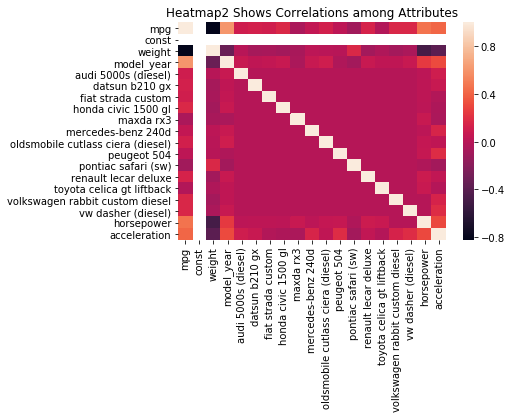

In [70]:
sns.heatmap(MPG7.corr())
plt.title('Heatmap2 Shows Correlations among Attributes')

##### Model8a

In the heatmap above, horsepower and weight are correlated. Comparing to weight, horsepower is not significant in the model with alpha of 0.05; therefore, let's drop this variable and rerun the model.

In [71]:
X_train8a=X_train7.drop(['horsepower'],axis=1)
X_test8a=X_test7.drop(['horsepower'],axis=1)

In [72]:
y_train8a=y_train1
y_test8a=y_test1

lm.fit(X_train8a, y_train8a)
predictions8a = lm.predict(X_train8a)

model8a = smf.OLS(y_train8a,X_train8a)
fitted8a = model8a.fit()
fitted8a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     96.96
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           2.49e-90
Time:                        21:34:21   Log-Likelihood:                -578.20
No. Observations:                 238   AIC:                             1190.
Df Residuals:                     221   BIC:                             1249.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -9.3475      4.401     -2.124      0.035     -18.021      -0.674
weight                               -0.0067      0.000    -25.878      0.000      -0.007      -0.006
model_year                            0.7186      0.055     13.146      0.000       0.611       0.826
audi 5000s (diesel)                  10.7927      2.883      3.743      0.000       5.110      16.475
datsun b210 gx                        9.1355      2.869      3.184      0.002       3.481      14.790
fiat strada custom                    6.1925      2.870      2.158      0.032       0.537      11.848
honda civic 1500 gl                  10.7689      2.885      3.733      0.000       5.084      16.454
maxda rx3                            -8.9987      2.879     -3.126      0.002     -14.672      -3.326
mercedes-benz 240d                    6.6676      2.912      2.290      0.023       0.929      12.406
oldsmobile cutlass ciera (diesel)    11.0001      2.877      3.824      0.000       5.331      16.669
peugeot 504                           4.4865      2.083      2.154      0.032       0.381       8.592
pontiac safari (sw)                   7.5196      2.903      2.590      0.010       1.798      13.241
renault lecar deluxe                  7.4418      2.872      2.591      0.010       1.782      13.102
toyota celica gt liftback            -6.6861      2.862     -2.336      0.020     -12.326      -1.046
volkswagen rabbit custom diesel      12.6565      2.893      4.375      0.000       6.956      18.357
vw dasher (diesel)                   14.1710      2.924      4.847      0.000       8.409      19.933
acceleration                         -0.1354      0.082     -1.661      0.098      -0.296       0.025
==============================================================================
Omnibus:                        5.370   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                6.208
Skew:                           0.192   Prob(JB):                       0.0449
Kurtosis:                       3.691   Cond. No.                     7.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

F-statistic and BIC show improvement in model 8a comparing to model 7. 

However, from the OLS table above, acceleration is still not significant with alpha of 0.05.

##### Model8b

In the heatmap above, acceleration and weight are correlated and comparing to weight, acceleration is not significant in the model. Instead of horsepower, let's drop acceleration variable and rerun the model.

In [73]:
X_train8b=X_train7.drop(['acceleration'],axis=1)
X_test8b=X_test7.drop(['acceleration'],axis=1)

In [74]:
y_train8b=y_train1
y_test8b=y_test1

lm.fit(X_train8b, y_train8b)
predictions8b = lm.predict(X_train8b)

model8b = smf.OLS(y_train8b,X_train8b)
fitted8b = model8b.fit()
fitted8b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     96.70
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           3.23e-90
Time:                        21:36:25   Log-Likelihood:                -578.48
No. Observations:                 238   AIC:                             1191.
Df Residuals:                     221   BIC:                             1250.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -10.9445      4.365     -2.508      0.013     -19.546      -2.343
weight                               -0.0064      0.000    -23.355      0.000      -0.007      -0.006
model_year                            0.6921      0.054     12.843      0.000       0.586       0.798
audi 5000s (diesel)                  10.1713      2.869      3.545      0.000       4.517      15.826
datsun b210 gx                        8.8965      2.868      3.102      0.002       3.244      14.549
fiat strada custom                    6.4989      2.869      2.265      0.024       0.845      12.152
honda civic 1500 gl                  11.3382      2.876      3.942      0.000       5.670      17.006
maxda rx3                            -8.9035      2.879     -3.092      0.002     -14.578      -3.229
mercedes-benz 240d                    5.6894      2.873      1.981      0.049       0.028      11.351
oldsmobile cutlass ciera (diesel)    10.6189      2.885      3.681      0.000       4.934      16.304
peugeot 504                           3.4317      2.035      1.686      0.093      -0.580       7.443
pontiac safari (sw)                   7.2830      2.912      2.501      0.013       1.543      13.023
renault lecar deluxe                  7.2071      2.879      2.503      0.013       1.533      12.881
toyota celica gt liftback            -6.8179      2.871     -2.375      0.018     -12.476      -1.160
volkswagen rabbit custom diesel      12.2261      2.873      4.255      0.000       6.564      17.889
vw dasher (diesel)                   13.3798      2.871      4.660      0.000       7.721      19.039
horsepower                            0.0108      0.007      1.494      0.137      -0.003       0.025
==============================================================================
Omnibus:                        5.380   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.795
Skew:                           0.227   Prob(JB):                       0.0552
Kurtosis:                       3.616   Cond. No.                     7.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Even though F-statistic and BIC show improvement in model 8b comparing to model 7. 8b has higher BIC and lower F-statistic comparing to 8a. 

##### Model8c

Let's try dropping acceleration and horsepower variable since they are not significant and rerun the model.

In [75]:
X_train8c=X_train7.drop(['acceleration','horsepower'],axis=1)
X_test8c=X_test7.drop(['acceleration','horsepower'],axis=1)

In [76]:
y_train8c=y_train1
y_test8c=y_test1

lm.fit(X_train8c, y_train8c)
predictions8c = lm.predict(X_train8c)

model8c = smf.OLS(y_train8c,X_train8c)
fitted8c = model8c.fit()
fitted8c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     102.4
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           9.40e-91
Time:                        21:38:46   Log-Likelihood:                -579.67
No. Observations:                 238   AIC:                             1191.
Df Residuals:                     222   BIC:                             1247.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -10.4756      4.365     -2.400      0.017     -19.079      -1.873
weight                               -0.0066      0.000    -26.832      0.000      -0.007      -0.006
model_year                            0.7003      0.054     13.029      0.000       0.594       0.806
audi 5000s (diesel)                  10.2554      2.877      3.565      0.000       4.587      15.924
datsun b210 gx                        8.8676      2.876      3.083      0.002       3.200      14.535
fiat strada custom                    6.4620      2.877      2.246      0.026       0.793      12.131
honda civic 1500 gl                  11.2199      2.883      3.892      0.000       5.538      16.902
maxda rx3                            -8.6757      2.883     -3.009      0.003     -14.358      -2.994
mercedes-benz 240d                    5.8287      2.879      2.024      0.044       0.155      11.503
oldsmobile cutlass ciera (diesel)    10.8823      2.887      3.769      0.000       5.192      16.572
peugeot 504                           3.6821      2.034      1.810      0.072      -0.327       7.691
pontiac safari (sw)                   7.5633      2.914      2.595      0.010       1.820      13.307
renault lecar deluxe                  7.4212      2.883      2.574      0.011       1.739      13.103
toyota celica gt liftback            -6.5053      2.871     -2.266      0.024     -12.164      -0.847
volkswagen rabbit custom diesel      12.0085      2.877      4.173      0.000       6.338      17.679
vw dasher (diesel)                   13.2101      2.877      4.592      0.000       7.540      18.880
==============================================================================
Omnibus:                        5.122   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                5.393
Skew:                           0.225   Prob(JB):                       0.0674
Kurtosis:                       3.584   Cond. No.                     7.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After dropping acceleration, and horsepower, BIC is lower than the previous models which indicates that this model is a better fit. However, this makes peugeot become insignificant with alpha of 0.05 and theoretically speaking, acceleration and hoursepower should affect the mpg. 

##### Model8d

What if we drop the variable weight? Even though it is significant and it is correlated with mpg, it is also corralted with acceleration and hourse power.

In [77]:
X_train8d=X_train7.drop(['weight'],axis=1)
X_test8d=X_test7.drop(['weight'],axis=1)

In [78]:
y_train8d=y_train1
y_test8d=y_test1

lm.fit(X_train8d, y_train8d)
predictions8d = lm.predict(X_train8d)

model8d = smf.OLS(y_train8d,X_train8d)
fitted8d = model8d.fit()
fitted8d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     18.86
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           5.53e-33
Time:                        21:44:34   Log-Likelihood:                -723.50
No. Observations:                 238   AIC:                             1481.
Df Residuals:                     221   BIC:                             1540.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -56.2179      7.216     -7.791      0.000     -70.439     -41.997
model_year                            0.9231      0.100      9.275      0.000       0.727       1.119
audi 5000s (diesel)                   6.9809      5.301      1.317      0.189      -3.466      17.428
datsun b210 gx                       12.0370      5.279      2.280      0.024       1.633      22.441
fiat strada custom                   10.4381      5.274      1.979      0.049       0.045      20.831
honda civic 1500 gl                  17.2843      5.287      3.269      0.001       6.865      27.704
maxda rx3                            -4.4986      5.297     -0.849      0.397     -14.937       5.940
mercedes-benz 240d                   -0.0743      5.336     -0.014      0.989     -10.589      10.441
oldsmobile cutlass ciera (diesel)     6.3839      5.295      1.206      0.229      -4.051      16.819
peugeot 504                           0.4132      3.829      0.108      0.914      -7.132       7.959
pontiac safari (sw)                  -3.3212      5.291     -0.628      0.531     -13.749       7.106
renault lecar deluxe                  9.9143      5.290      1.874      0.062      -0.512      20.340
toyota celica gt liftback            -6.8597      5.286     -1.298      0.196     -17.277       3.558
volkswagen rabbit custom diesel      16.0083      5.333      3.002      0.003       5.498      26.518
vw dasher (diesel)                   13.7035      5.394      2.541      0.012       3.074      24.333
horsepower                            0.0795      0.012      6.457      0.000       0.055       0.104
acceleration                          0.3448      0.146      2.363      0.019       0.057       0.632
==============================================================================
Omnibus:                        4.856   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.554
Skew:                           0.281   Prob(JB):                        0.103
Kurtosis:                       2.621   Cond. No.                     2.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that even though the Durbin Watson score shows no autocorrelation problem, Adj R-squared, F-statistic, Prob (F-statistic), AIC, and BIC all say that the model got worse after we had removed weight.

Overall, it makes more sense increase our alpha to 10% and accept model 7 to have a reasonable model.

##### Final Model

In [84]:
X_trainF=X_train7
X_testF=X_test7

In [93]:
y_trainF=y_train7
y_testF=y_test7

lm.fit(X_trainF, y_trainF)
predictionsF = lm.predict(X_trainF)

modelF = smf.OLS(y_trainF,X_trainF)
fittedF = modelF.fit()
fittedF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     92.24
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           5.83e-90
Time:                        21:56:52   Log-Likelihood:                -576.61
No. Observations:                 238   AIC:                             1189.
Df Residuals:                     220   BIC:                             1252.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -9.7446      4.388     -2.221      0.027     -18.392      -1.097
weight                               -0.0065      0.000    -23.151      0.000      -0.007      -0.006
model_year                            0.7114      0.055     13.034      0.000       0.604       0.819
audi 5000s (diesel)                  10.7642      2.871      3.750      0.000       5.106      16.422
datsun b210 gx                        9.2030      2.857      3.221      0.001       3.573      14.834
fiat strada custom                    6.2007      2.857      2.170      0.031       0.570      11.832
honda civic 1500 gl                  10.8479      2.872      3.777      0.000       5.187      16.508
maxda rx3                            -9.3027      2.871     -3.240      0.001     -14.962      -3.644
mercedes-benz 240d                    6.6138      2.899      2.281      0.023       0.900      12.328
oldsmobile cutlass ciera (diesel)    10.7112      2.869      3.733      0.000       5.057      16.366
peugeot 504                           4.3003      2.077      2.070      0.040       0.207       8.394
pontiac safari (sw)                   7.1907      2.897      2.482      0.014       1.482      12.899
renault lecar deluxe                  7.1974      2.863      2.514      0.013       1.555      12.840
toyota celica gt liftback            -7.0697      2.858     -2.474      0.014     -12.702      -1.437
volkswagen rabbit custom diesel      12.9901      2.886      4.500      0.000       7.302      18.679
vw dasher (diesel)                   14.4893      2.917      4.968      0.000       8.741      20.237
horsepower                            0.0125      0.007      1.720      0.087      -0.002       0.027
acceleration                         -0.1526      0.082     -1.866      0.063      -0.314       0.009
==============================================================================
Omnibus:                        5.724   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                6.827
Skew:                           0.194   Prob(JB):                       0.0329
Kurtosis:                       3.733   Cond. No.                     7.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interpreting model

In [81]:
print(lm.intercept_)

-9.74460532796


In [82]:
coeff_MPG7 = pd.DataFrame(lm.coef_,X_trainF.columns,columns=['Coefficient'])
coeff_MPG7

,Coefficient
const,0.000000
weight,-0.006532
model_year,0.711422
audi 5000s (diesel),10.764222
datsun b210 gx,9.203031
fiat strada custom,6.200709
honda civic 1500 gl,10.847900
maxda rx3,-9.302658
mercedes-benz 240d,6.613843
oldsmobile cutlass ciera (diesel),10.711192


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **weight** is associated with a **decrease of 0.007 unit in mpg **.
- Holding all other features fixed, a 1 unit increase in **model_year** is associated with an **increase of 0.711 unit in mpg **.
- Holding all other features fixed, a 1 unit increase in **horsepower** is associated with an **increase of 0.012 unit in mpg **.
- Holding all other features fixed, a 1 unit increase in **acceleration** is associated with a **decrease of 0.153 unit in mpg **.
- With the same weight, accelerate,horsepower, and model year, if the vehicle is an **audi 5000s (diesel)** it is associated with an average mpg **increase of 10.764 unit **. 
- With the same weight, accelerate,horsepower, and model year, if the vehicle is a **datsun b210 gx** it is associated with an average mpg **increase of 9.203 unit **.
- With the same weight, accelerate,horsepower, and model year, if the vehicle is a **fiat strada custom** it is associated with an average mpg **increase of 6.2 unit **.
- With the same weight, accelerate,horsepower, and model year, if the vehicle is a **honda civic 1500 gl** it is associated with an average mpg **increase of 10.848 unit **.
- With the same weight, accelerate,horsepower, and model year, if the vehicle is a **maxda rx3** it is associated with an average mpg **decrease of -9.303 unit **.
- With the same weight, accelerate,horsepower, and model year, if the vehicle is a **mercedes-benz 240d** it is associated with an average mpg **increase of 6.614 unit **.
- With the same weight, accelerate,horsepower, and model year, if the vehicle is an **oldsmobile cutlass ciera (diesel)** it is associated with an average mpg **increase of 10.711 unit **.
- With the same weight, accelerate,horsepower, and model year, if the vehicle is a **peugeot 504** it is associated with an average mpg **increase of 4.3 unit **.
- With the same weight, accelerate,horsepower, and model year, if the vehicle is a **pontiac safari (sw)** it is associated with an average mpg **increase of 7.19 unit **.
- With the same weight, accelerate,horsepower, and model year, if the vehicle is a **renault lecar deluxe** it is associated with an average mpg **increase of 7.2 unit **.
- With the same weight, accelerate,horsepower, and model year, if the vehicle is a **toyota celica gt liftback** it is associated with an average mpg **decrease of 7.07 unit **.
- With the same weight, accelerate,horsepower, and model year, if the vehicle is a **volkswagen rabbit custom diesel** it is associated with an average mpg **increase of 12.99 unit **.
- With the same weight, accelerate,horsepower, and model year, if the vehicle is a **vw dasher (diesel)** it is associated with an average mpg **increase of 14.49 unit **.

In [99]:
lm.fit(X_testF,y_testF)
predictionsFt = lm.predict(X_testF)

Text(0.5,1,'Residual Scatter Plot')

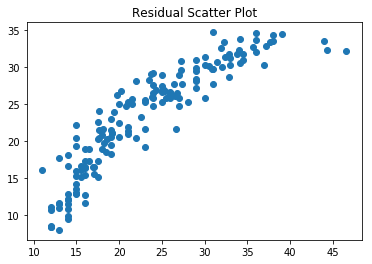

In [100]:
plt.scatter(y_testF,predictionsFt)
plt.title('Residual Scatter Plot')

#### Residual Histogram

Text(0.5,1,'Residual Histogram')

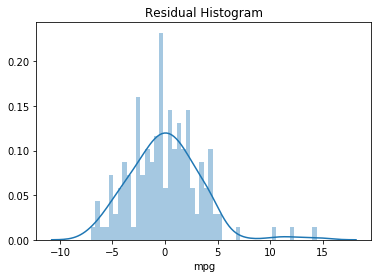

In [101]:
sns.distplot((y_testF-predictionsFt),bins=50)
plt.title('Residual Histogram')

#### Residual Evaluation

In [102]:
from sklearn import metrics

In [103]:
print('Final Model Residual Statistic')
print('MAE:', metrics.mean_absolute_error(y_testF, predictionsFt))
print('MSE:', metrics.mean_squared_error(y_testF, predictionsFt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_testF, predictionsFt)))

Final Model Residual Statistic
MAE: 2.55284615863
MSE: 11.1676355103
RMSE: 3.3418012374


In [104]:
print('Final Model Residual Statistic')
print('MAE:', metrics.mean_absolute_error(y_test1, predictions))
print('MSE:', metrics.mean_squared_error(y_test1, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, predictions)))

Final Model Residual Statistic
MAE: 0.2091564282
MSE: 0.225583592729
RMSE: 0.474956411399


Comparing to the residual statistic of the model 1 and the final model, it is reasonable that the final model has higher error since the first model included all variable. Such low RMSE in model 1 could lead to over fitting problem while RMSE in Final model shows a more reasonable statistic.